### Logistic Regression
for heart disease prediction

https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
f_df = pd.read_csv("./framingham.csv")

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >,

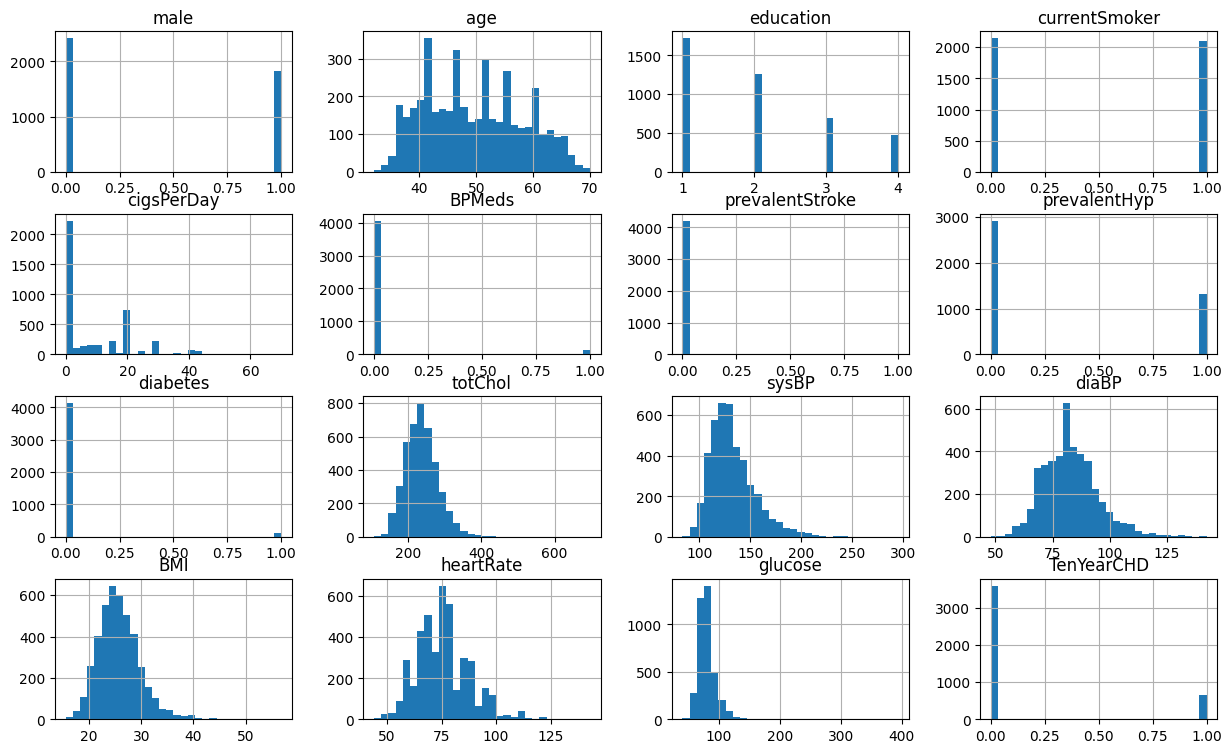

In [10]:
# explore the data
f_df.hist(bins=30, figsize=(15,35), layout=(15,4))

In [8]:
# drop any duplicates


In [14]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

#scale continuous columns data
array_scaled = scaler.fit_transform(f_df)
scaled_df = pd.DataFrame(array_scaled)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, 

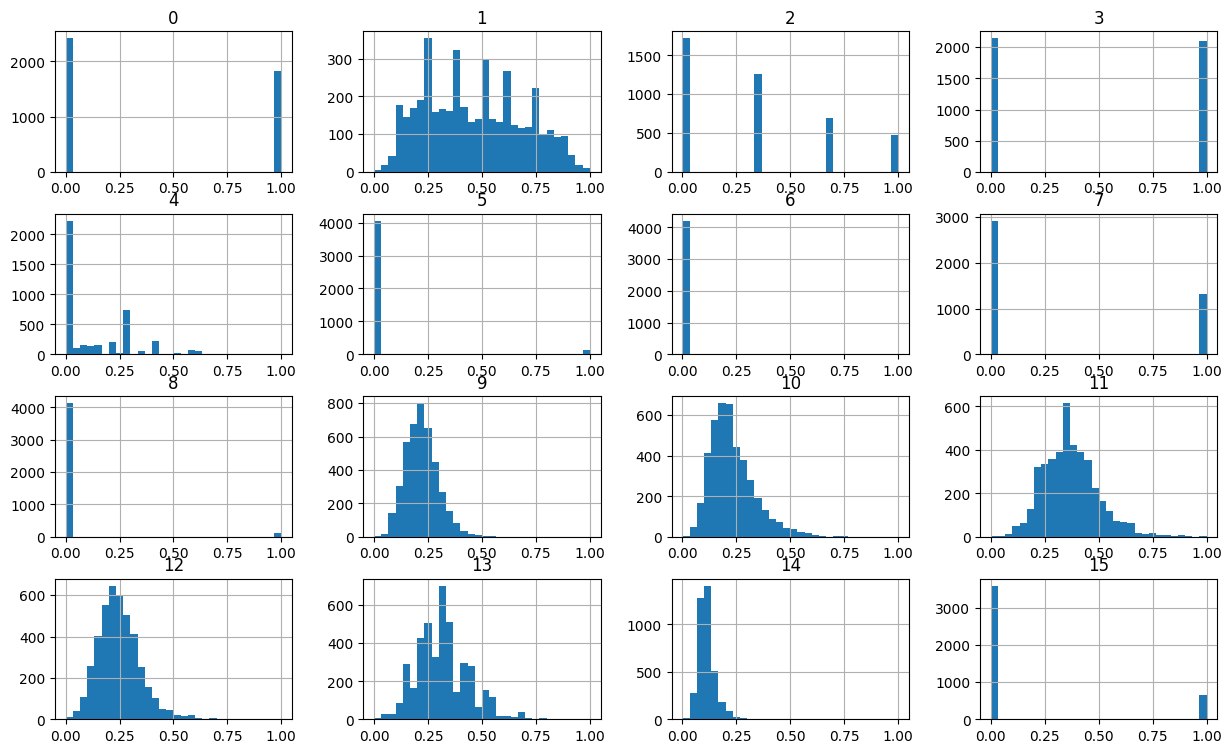

In [16]:
# compare this scaled data with those above
scaled_df.hist(bins=30, figsize=(15,35), layout=(15,4))

<Axes: >

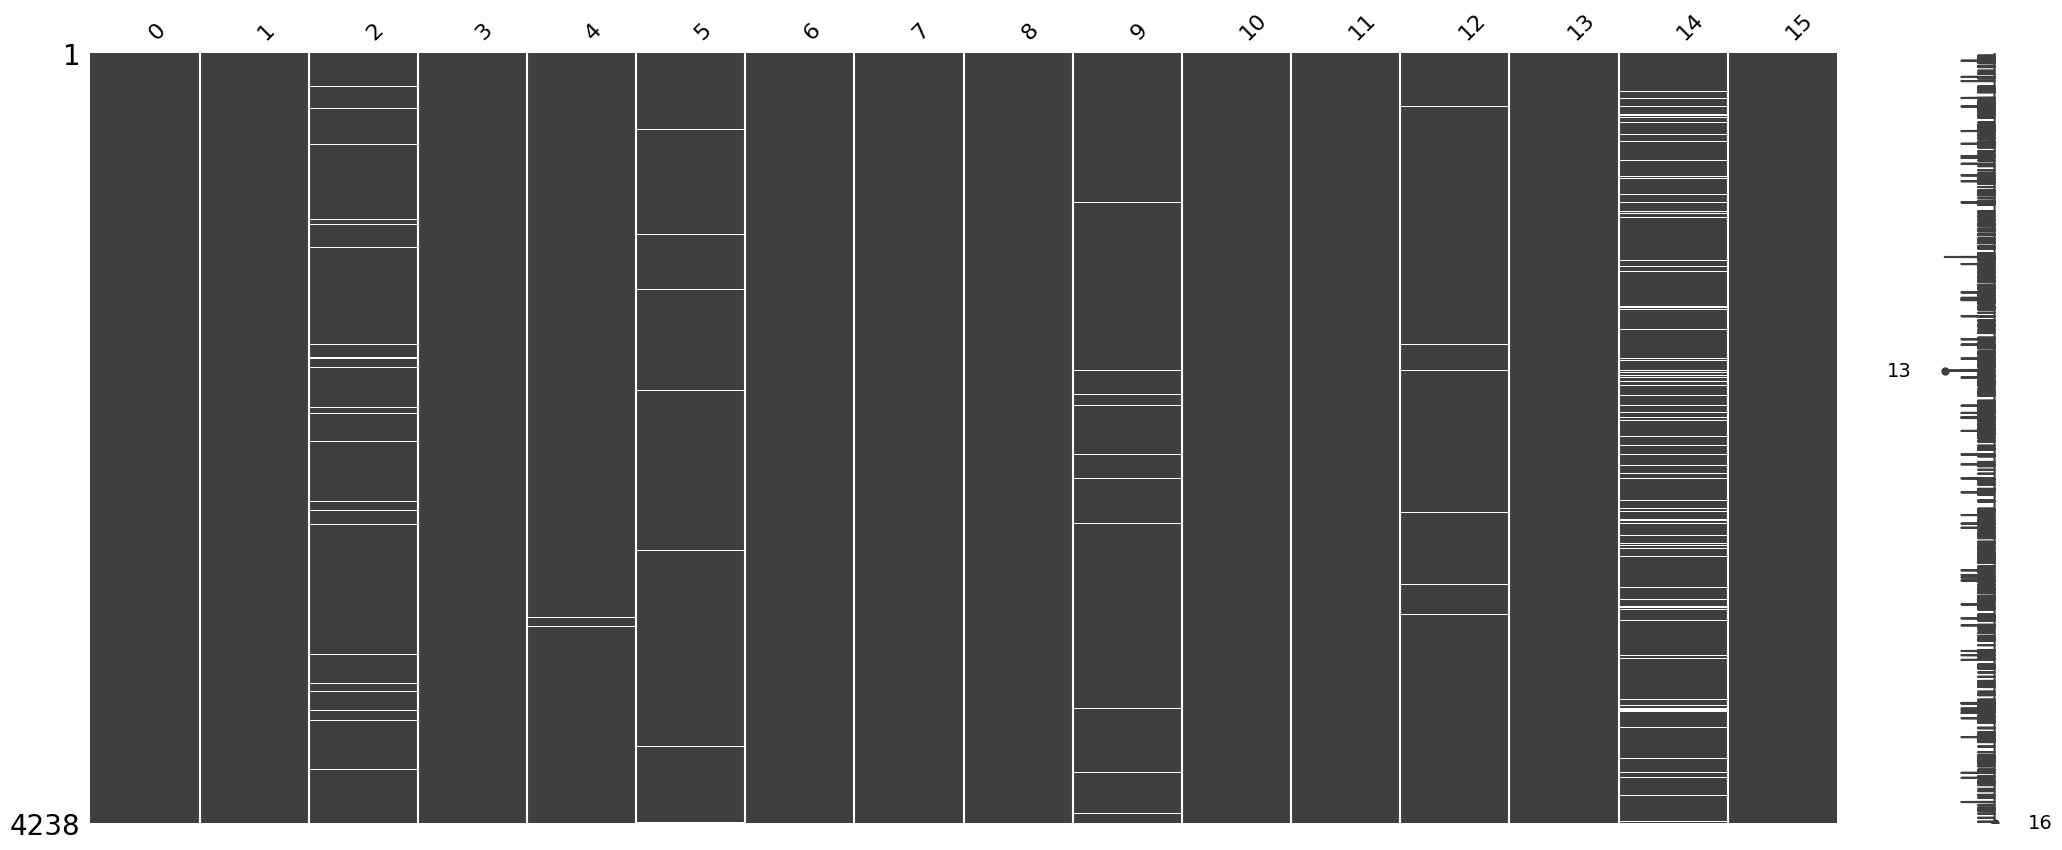

In [19]:
# visualize any missing values 
import missingno as msno
msno.matrix(scaled_df)

False


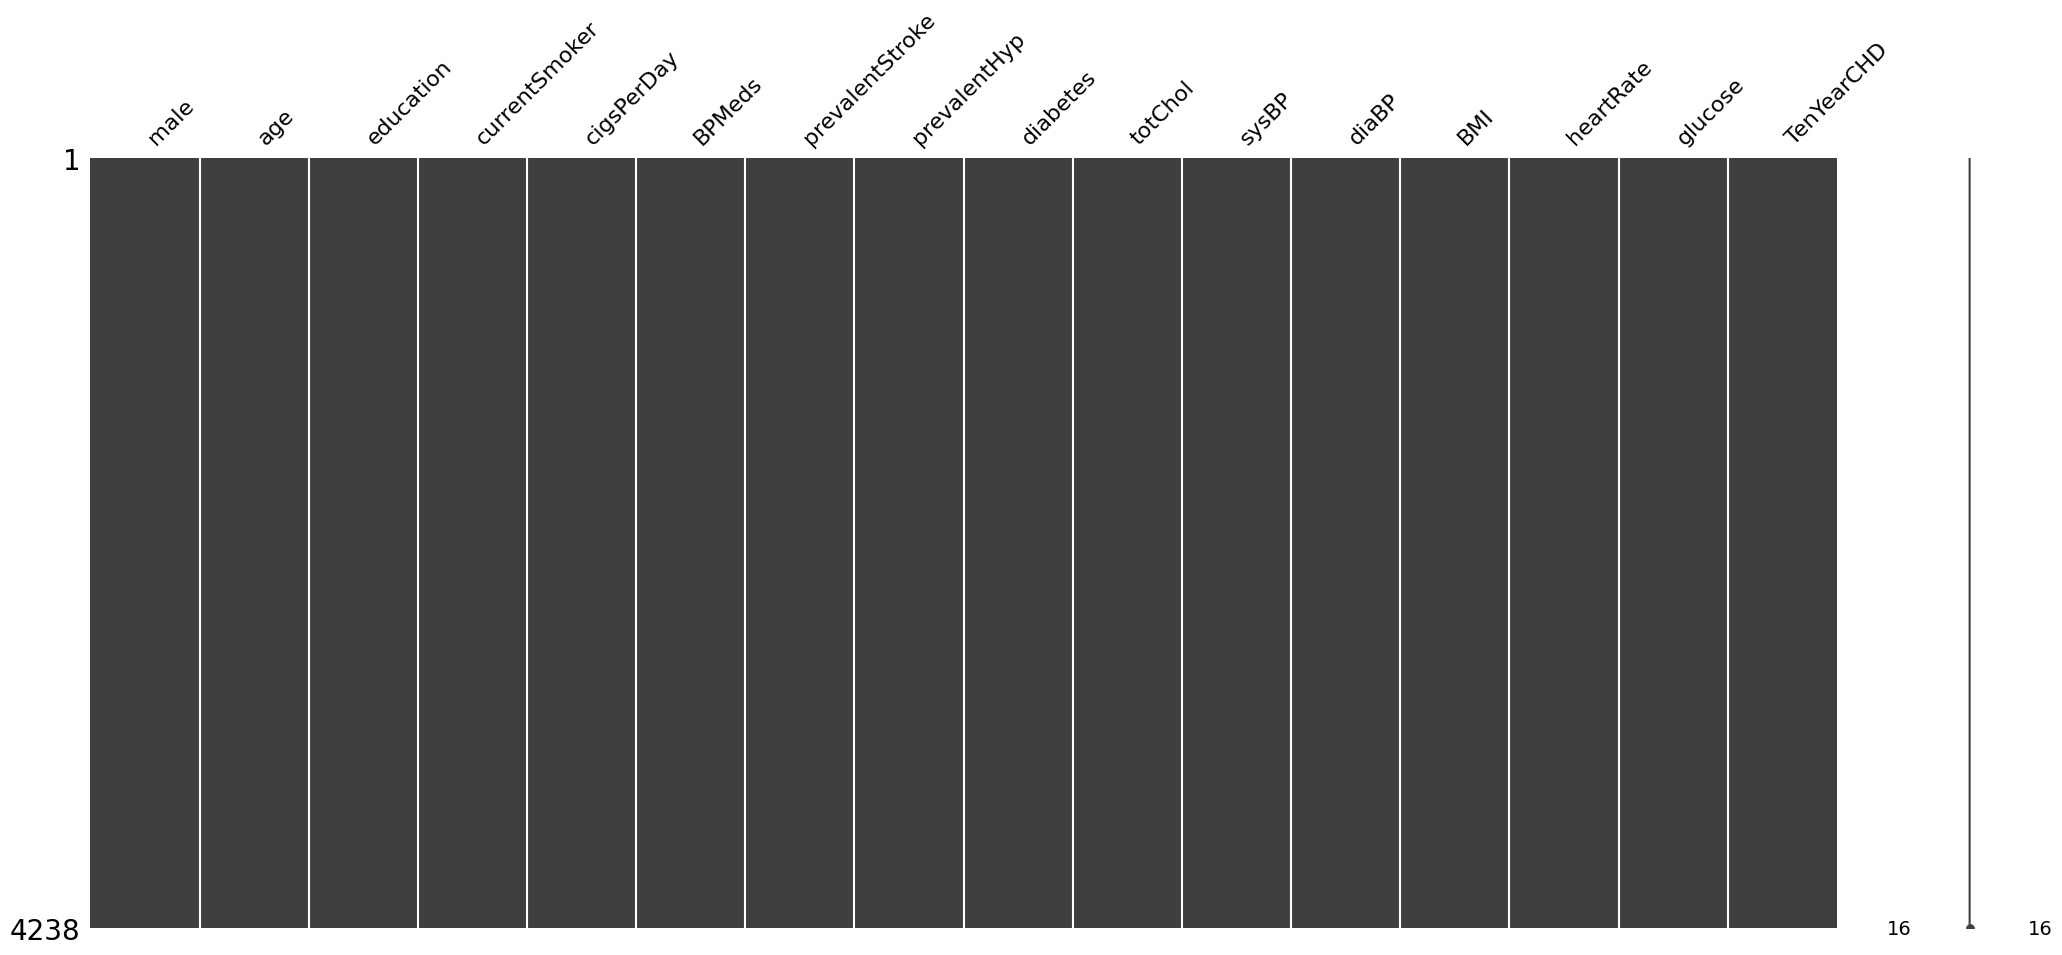

In [22]:
# impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#iterative imputer module, impute on the scaled dataset
imputer = IterativeImputer()
impute_df = imputer.fit_transform(scaled_df)

#impute dataframe 
impute_df = pd.DataFrame(data=impute_df, columns=f_df.columns)

#double check for missing value
print(impute_df.isnull().values.any())

# verify that all missing values have been filled-in
msno.matrix(impute_df);

In [25]:
# after imputing, some values weren't rounded to either 0.0 or to 1.0; let's fix that
impute_df['BPMeds'] = impute_df['BPMeds'].round(decimals=0)
impute_df['education'] = impute_df['education'].round(decimals=0)

In [26]:
# Do we need to handle outliers?

from sklearn.model_selection import train_test_split

#Separate label (y) and predictor (X)
X = impute_df.drop('TenYearCHD', axis=1)
y = impute_df['TenYearCHD']

# split the data set for winsorization (onliy winsorize on the train set and NOT on the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

#check 
print('X_train:',X_train.shape,', X_test:', X_test.shape)

X_train: (3390, 15) , X_test: (848, 15)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f02cb1e0f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02caf238d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02c83fcb10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f02c83b1b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02c83b2390>,
 'means': []}

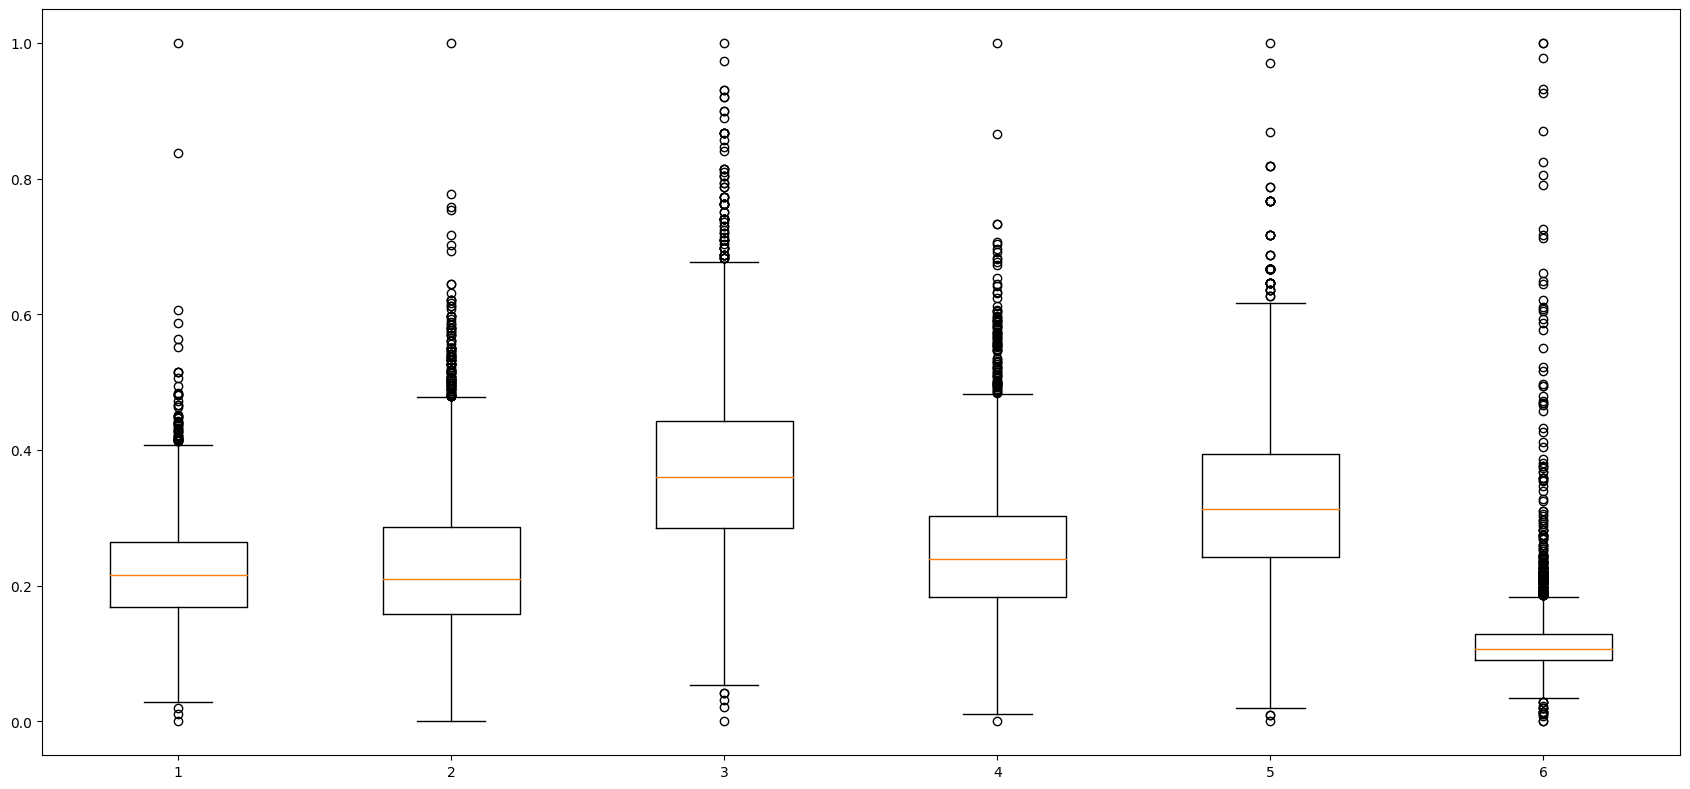

In [41]:
# visualize any outliers
plt.rcParams["figure.figsize"] = [17, 8]
plt.rcParams["figure.autolayout"] = True
cols = impute_df.columns.tolist()[9:-1]
plt.boxplot(x=impute_df[cols])
#plt.xticks(ticks=range(1,9), labels=np.array(cols))

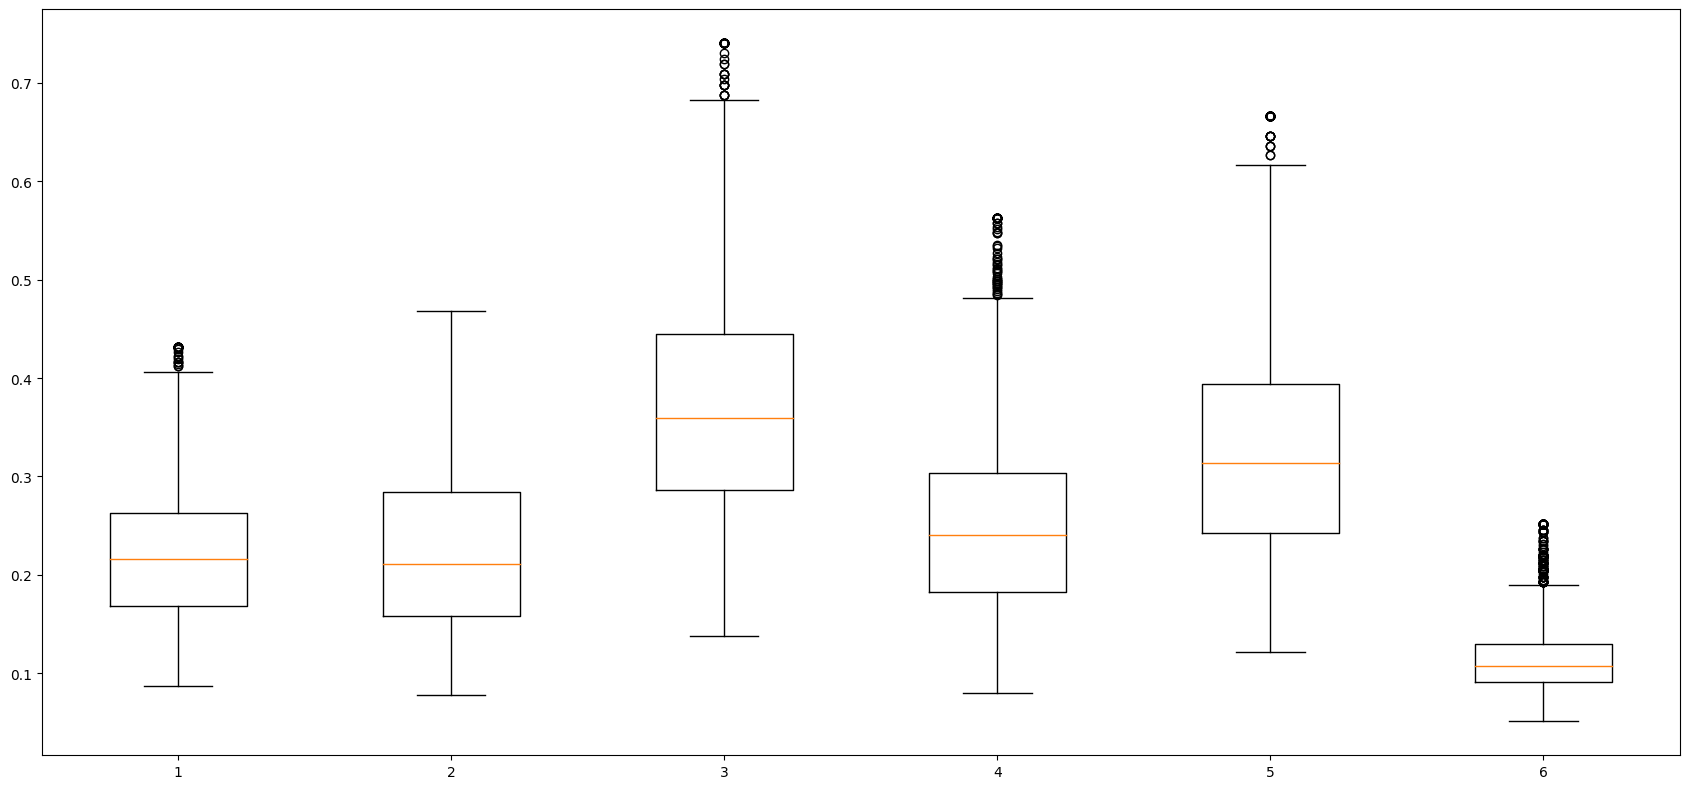

In [43]:
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

# Winzorize the columns 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' , & 'cigPerDay'
totChol_wins = mstats.winsorize(X_train['totChol'], limits=[0.02, 0.009])
sysBP_wins = mstats.winsorize(X_train['sysBP'], limits=[0.02, 0.03])
diaBP_wins = mstats.winsorize(X_train['diaBP'], limits=[0.02, 0.01])
BMI_wins = mstats.winsorize(X_train['BMI'], limits=[0.02, 0.01])
heartRate_wins = mstats.winsorize(X_train['heartRate'], limits=[0.03, 0.01])
glucose_wins = mstats.winsorize(X_train['glucose'], limits=[0.02, 0.02])
cigsPerDay_wins = mstats.winsorize(X_train['cigsPerDay'], limits=[0.02, 0.01])

# add the winsorized 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'Glucose' columns back to the train DataFrame
X_train['totChol'] = totChol_wins
X_train['sysBP'] = sysBP_wins
X_train['diaBP'] = diaBP_wins
X_train['BMI'] = BMI_wins
X_train['heartRate'] = heartRate_wins
X_train['glucose'] =glucose_wins
X_train['cigsPerDay'] =cigsPerDay_wins

# visualize outlier (after winsorization)
plt.boxplot(x=X_train[cols]);
#plt.xticks(ticks=range(1,9), labels=np.array(continuous_cols));

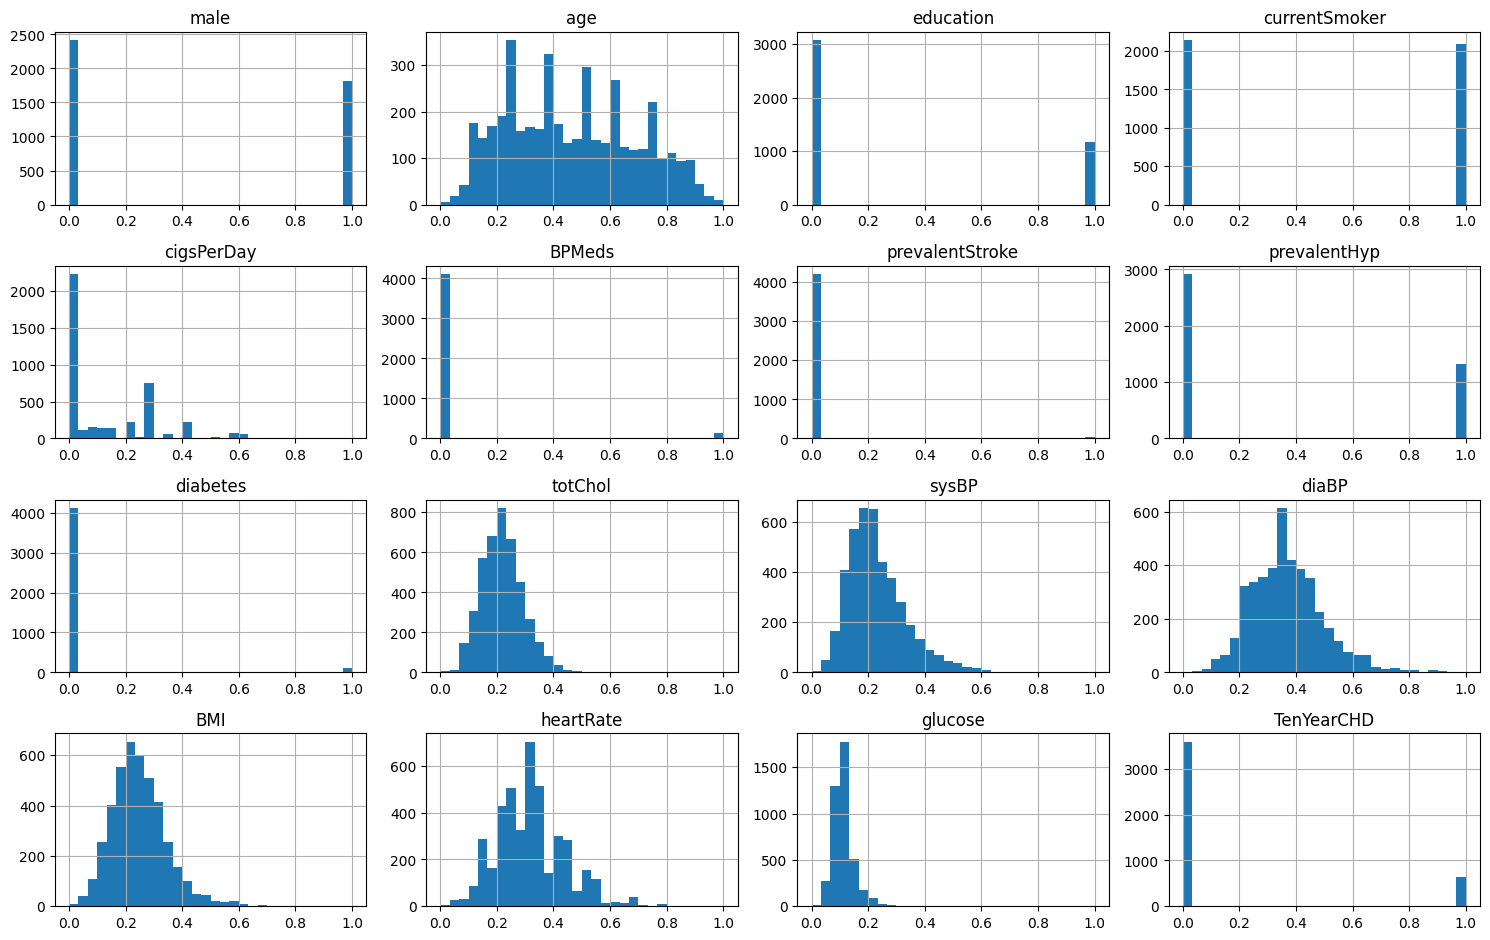

In [46]:
# distributions before winsorization
impute_df.hist(bins=30, figsize=(15,35), layout=(15,4));


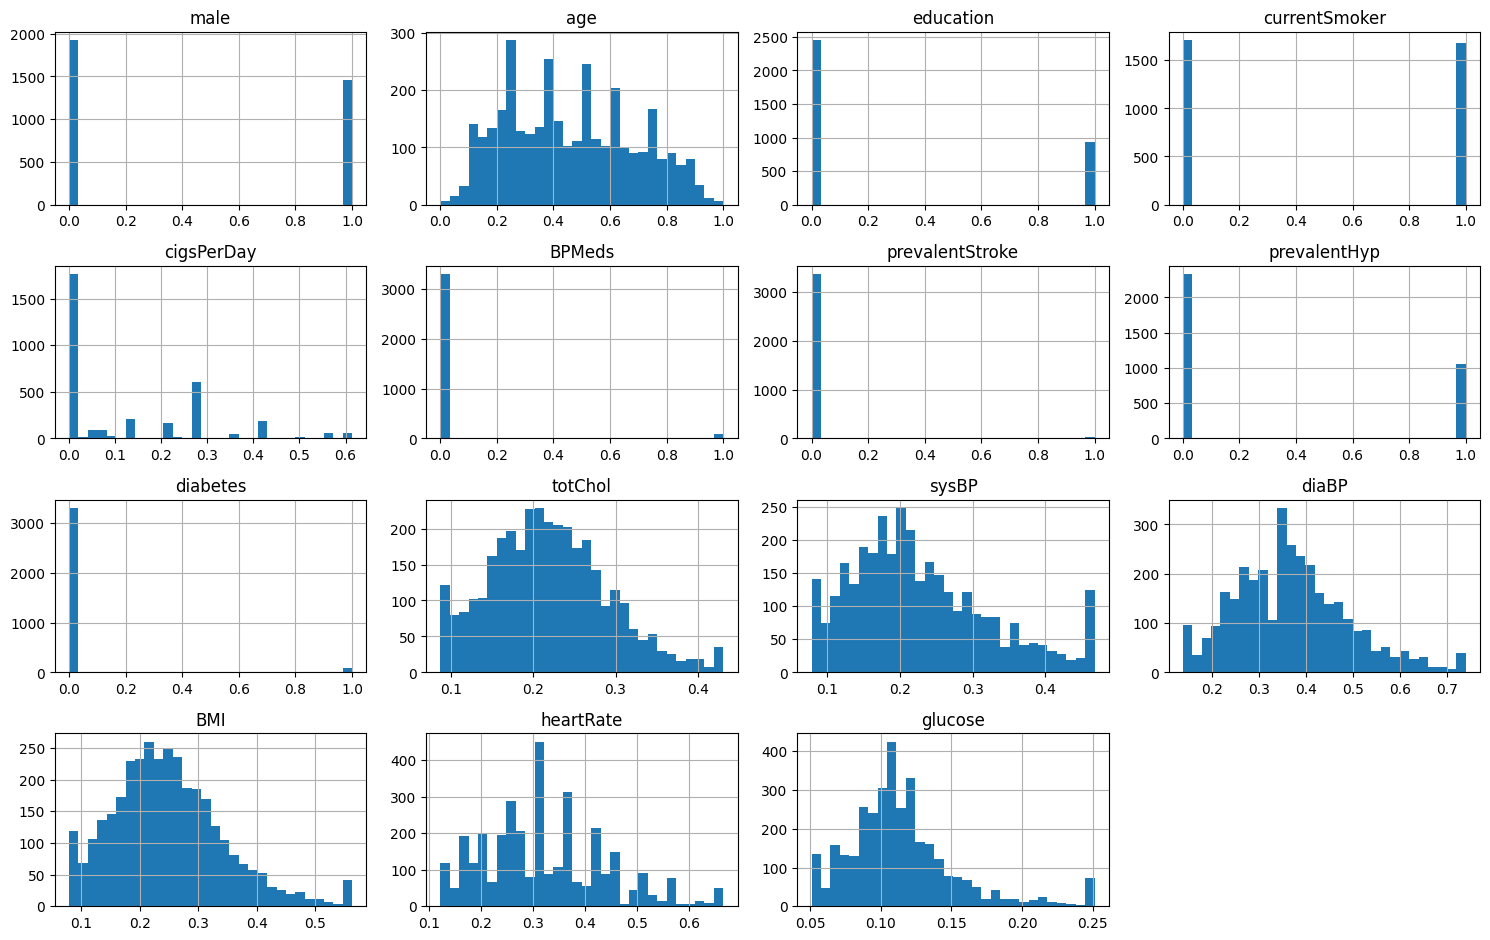

In [48]:
# distributions after winsorization
X_train.hist(bins=30, figsize=(15,35), layout=(15,4));


### Build and Fit the model

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

feature_list = list(X_train.columns)

#class weighting (more weight on minority class - class 1)
class_weight = {0: 1, 1: 1.2}

#create LogisticRegression model
lr = LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weight)

#define tunning parameter
hyperparameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

#create GridSearchCV model
grid_search = GridSearchCV(lr,hyperparameters, cv=5, scoring='roc_auc')

#fit data into grid_search
grid_search.fit(X_train[feature_list] , y_train),

#print best hyperparameters results and model score 
print(grid_search.best_params_, grid_search.best_score_)

#predict
y_proba = grid_search.predict_proba(X_test[feature_list])[:,1]

# Threshold value can be adjusted to prioritize certain types of errors over others.
# ex: customize threshold to increase sensitivity  to patience with the disease (reduce false negative)
y_pred = (y_proba>0.5).astype(int)

{'C': 1, 'penalty': 'l1'} 0.7389869143098353



### Model Evaluation

<Axes: >

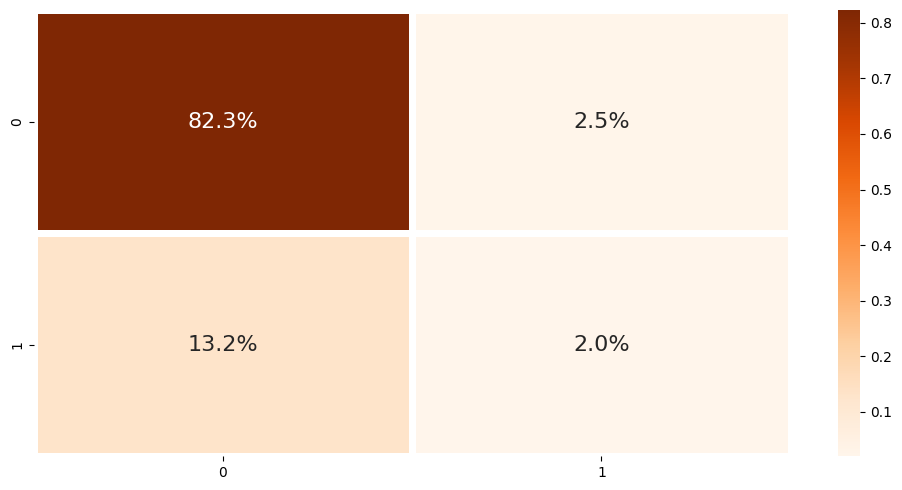

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

# confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(10,5))
sns.heatmap(
    conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%',
    cmap='Oranges', linewidths=5, annot_kws={"fontsize":16}
)

In [64]:
#classification report (#Precision & Recall & F1 score)
cr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.861728    0.447368   0.84316    0.654548      0.798695
recall       0.970793    0.131783   0.84316    0.551288      0.843160
f1-score     0.913015    0.203593   0.84316    0.558304      0.805096
support    719.000000  129.000000   0.84316  848.000000    848.000000

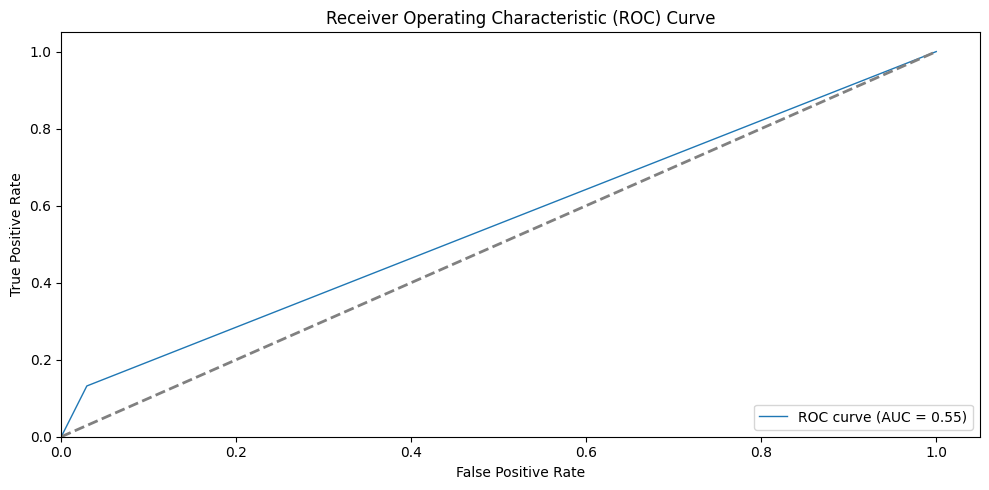

In [63]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Well, after all this work we are still far from having an ideal classifier for this data. We could have gotten better performance with feature selection, though, given that we were restricting ourselves to using Logistic Regression though, we probably wouldn't have done too much better.